### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
# Calculando o faturamento total de cada loja:
faturamento_lojas = {
"Loja 1": loja["Preço"].sum(),
"loja 2": loja2["Preço"].sum(),
"loja 3": loja3["Preço"].sum(),
"loja 4": loja4["Preço"].sum()
}

# Exibindo o resultado do faturamento por loja
for nome_loja, total in faturamento_lojas.items():
  print(f"{nome_loja}: R${total:,.2f}")

# Calculando o total geral
total_geral = sum(faturamento_lojas.values())

# Exibindo o total geral com formatação brasileira
print(f"\nTotal geral: R$ {total_geral:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))

Loja 1: R$1,534,509.12
loja 2: R$1,488,459.06
loja 3: R$1,464,025.03
loja 4: R$1,384,497.58

Total geral: R$ 5.871.490,79


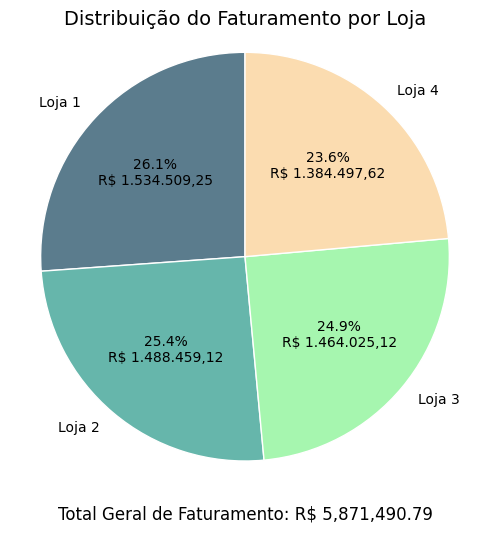

In [ ]:
# Importando a biblioteca
import matplotlib.pyplot as plt

# Dados de faturamento
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
faturamentos = [1534509.12, 1488459.06, 1464025.03, 1384497.58]
cores = ['#5b7c8d', '#66b6ab', '#a6f6af', '#fbdcb0']
total_geral = sum(faturamentos)

# Função para formatar valores em reais no padrão brasileiro
def formato_brasileiro(valor):
    s = f'{valor:,.2f}'
    s = s.replace(',', 'X').replace('.', ',').replace('X', '.')
    return f'R$ {s}'

# Função para exibir percentual + valor no gráfico
def mostrar_valores(p):
    valor = p / 100 * total_geral
    return f'{p:.1f}%\n{formato_brasileiro(valor)}'

# Criando gráfico de pizza
plt.figure(figsize=(5, 5))
plt.pie(
    faturamentos,
    labels=lojas,
    colors=cores,
    autopct=mostrar_valores,
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)

# Adicionando título
plt.title('Distribuição do Faturamento por Loja', fontsize=14)

# Deixando a pizza como círculo perfeito
plt.axis('equal')

# Adicionadno o valor total do faturamento abaixo da figura
plt.figtext(0.5, -0.05, f"Total Geral de Faturamento: R$ {total_geral:,.2f}",
            ha="center", fontsize=12, color='black')

# Plotando o gráfico
plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


In [ ]:
# Lista com os DataFrames das lojas
lojas = [loja, loja2, loja3, loja4]
nomes = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

# Calculando e exibindo as categorias vendidas em cada loja
for i in range(len(lojas)):
    print(f"{nomes[i]}:")

    # Conta a quantidade de vendas por categoria e transforma em DataFrame
    vendas = lojas[i]["Categoria do Produto"].value_counts().reset_index()
    vendas.columns = ["Categoria de Produtos", "Quantidade Vendida"]

    # Exibindo os resultados
    print(vendas)
    print()  # pula uma linha em branco


Loja 1:
   Categoria de Produtos  Quantidade Vendida
0                 moveis                 465
1            eletronicos                 448
2             brinquedos                 324
3       eletrodomesticos                 312
4        esporte e lazer                 284
5  instrumentos musicais                 182
6                 livros                 173
7  utilidades domesticas                 171

Loja 2:
   Categoria de Produtos  Quantidade Vendida
0                 moveis                 442
1            eletronicos                 422
2             brinquedos                 313
3       eletrodomesticos                 305
4        esporte e lazer                 275
5  instrumentos musicais                 224
6                 livros                 197
7  utilidades domesticas                 181

Loja 3:
   Categoria de Produtos  Quantidade Vendida
0                 moveis                 499
1            eletronicos                 451
2             brinquedos     

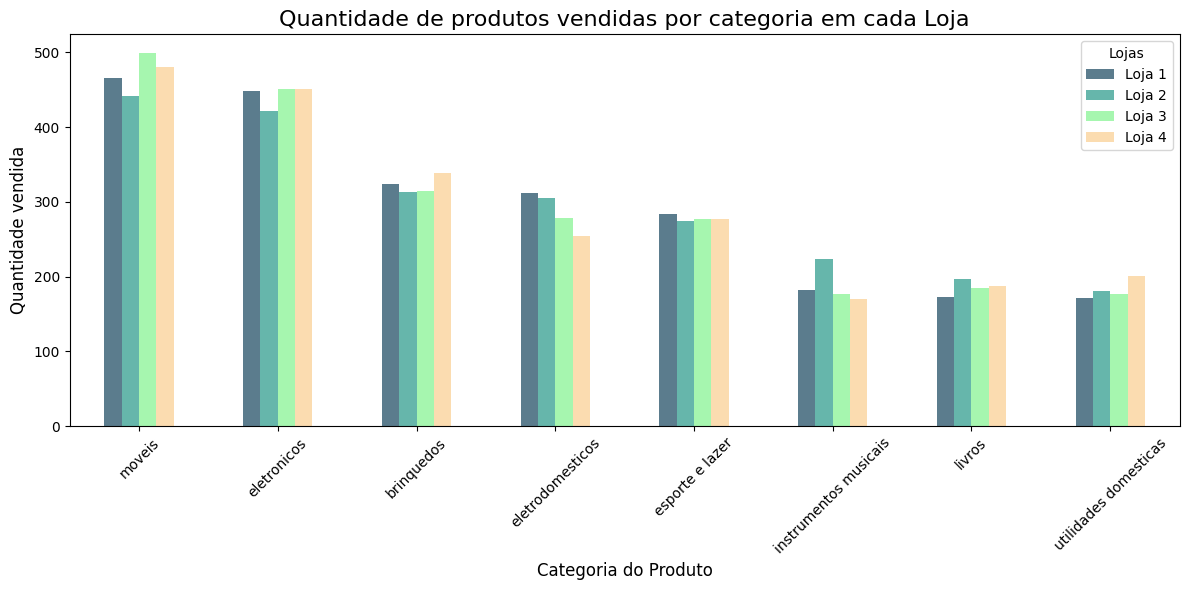

In [ ]:
# Importando a biblioteca
import pandas as pd
import matplotlib.pyplot as plt

# Removendo espaços dos nomes das colunas
for df in [loja, loja2, loja3, loja4]:
    df.columns = df.columns.str.strip()

# Contabilizando os produtos das categorias por loja
categoria_loja1 = loja["Categoria do Produto"].value_counts()
categoria_loja2 = loja2["Categoria do Produto"].value_counts()
categoria_loja3 = loja3["Categoria do Produto"].value_counts()
categoria_loja4 = loja4["Categoria do Produto"].value_counts()

# Montando DataFrame com todas as lojas
df_categorias = pd.DataFrame({
    "Loja 1": categoria_loja1,
    "Loja 2": categoria_loja2,
    "Loja 3": categoria_loja3,
    "Loja 4": categoria_loja4
}).fillna(0) # Substitui valores ausentes por 0

# Ordenando pela soma total de cada categoria (ordem decrescente)
df_categorias = df_categorias.loc[df_categorias.sum(axis=1).sort_values(ascending=False).index]

# Definição das cores personalizadas
cores = ['#5b7c8d', '#66b6ab', '#a6f6af', '#fbdcb0']

# Criando gráfico de barras
df_categorias.plot(kind="bar", figsize=(12, 6), color=cores)

# Adicionando título e Eixos
plt.title("Quantidade de produtos vendidas por categoria em cada Loja", fontsize=16)
plt.xlabel("Categoria do Produto", fontsize=12)
plt.ylabel("Quantidade vendida", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Lojas")

# Plotando gráfico de barras agrupadas
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [ ]:
# Calculando a média de avaliação de cada loja
media_avaliacao_loja1 = loja['Avaliação da compra'].mean()
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()

# Exibindo os resultados da avaliação
print("Média de Avaliação das Lojas:")
print(f"Loja 1: {media_avaliacao_loja1:.2f}")
print(f"Loja 2: {media_avaliacao_loja2:.2f}")
print(f"Loja 3: {media_avaliacao_loja3:.2f}")
print(f"Loja 4: {media_avaliacao_loja4:.2f}")

Média de Avaliação das Lojas:
Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00


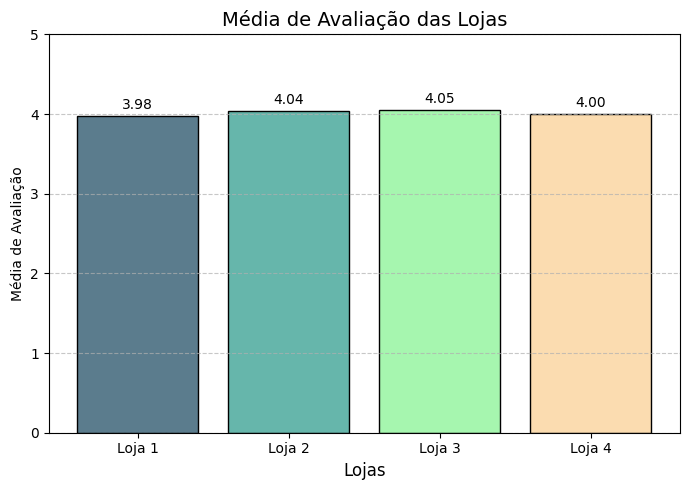

In [ ]:
# Importando a biblioteca
import matplotlib.pyplot as plt

# Dados das lojas
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
medias = [media_avaliacao_loja1, media_avaliacao_loja2, media_avaliacao_loja3, media_avaliacao_loja4]
cores = ['#5b7c8d', '#66b6ab', '#a6f6af', '#fbdcb0']

# Criando o gráfico de barras
plt.figure(figsize=(7,5))
barras = plt.bar(lojas, medias, color=cores, edgecolor='black')

# Adicionando título e Eixos
plt.title('Média de Avaliação das Lojas', fontsize=14)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Média de Avaliação')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando o valor em cima de cada barra
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval + 0.05, f'{yval:.2f}', ha='center', va='bottom')

# Plotando o gráfico
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
# Definindo a função do produtos destaques
def produto_destaque(loja_df, nome_loja):
    contagem = loja_df["Produto"].value_counts()
    mais_vendido = contagem.idxmax()
    menos_vendido = contagem.idxmin()

   # Exibindo os resultados
    print(f"{nome_loja} - Produto mais vendido: {mais_vendido} ({contagem.max()} vendas)")
    print(f"{nome_loja} - Produto menos vendido: {menos_vendido} ({contagem.min()} vendas)")
    print()

# Aplicação de DataFrames para cada loja
produto_destaque(loja, "Loja 1")
produto_destaque(loja2, "Loja 2")
produto_destaque(loja3, "Loja 3")
produto_destaque(loja4, "Loja 4")


Loja 1 - Produto mais vendido: Micro-ondas (60 vendas)
Loja 1 - Produto menos vendido: Headset (33 vendas)

Loja 2 - Produto mais vendido: Iniciando em programação (65 vendas)
Loja 2 - Produto menos vendido: Jogo de tabuleiro (32 vendas)

Loja 3 - Produto mais vendido: Kit banquetas (57 vendas)
Loja 3 - Produto menos vendido: Blocos de montar (35 vendas)

Loja 4 - Produto mais vendido: Cama box (62 vendas)
Loja 4 - Produto menos vendido: Guitarra (33 vendas)



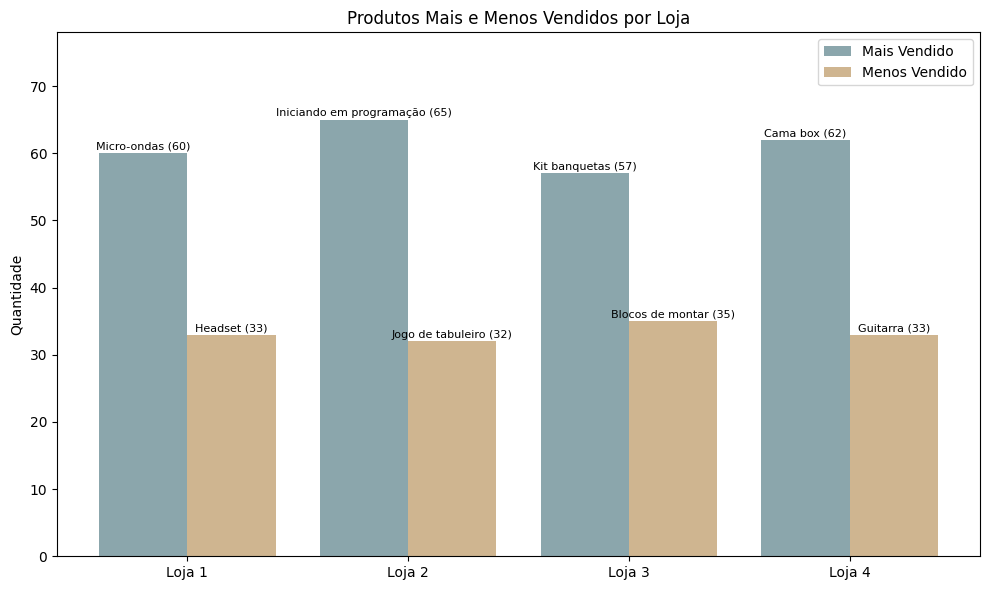

In [ ]:
# Importando as bibliotecas
import matplotlib.pyplot as plt
import pandas as pd

# Definindo os produtos destaques
def produto_destaque(lojas, nomes_lojas):
    destaques = []
    for loja_df, nome in zip(lojas, nomes_lojas):
        contagem = loja_df["Produto"].value_counts()
        destaques.append({
            "Loja": nome,
            "Mais": contagem.idxmax(),
            "QtdMais": contagem.max(),
            "Menos": contagem.idxmin(),
            "QtdMenos": contagem.min()
        })
    return pd.DataFrame(destaques)

# DataFrames: loja, loja2, loja3, loja4
df = produto_destaque([loja, loja2, loja3, loja4], ["Loja 1", "Loja 2", "Loja 3", "Loja 4"])

# Criando o gráfico
plt.figure(figsize=(10, 6))
x = range(len(df))
plt.bar([i - 0.2 for i in x], df["QtdMais"], width=0.4, color="#8ba6ac", label="Mais Vendido")
plt.bar([i + 0.2 for i in x], df["QtdMenos"], width=0.4, color="#cfb590", label="Menos Vendido")

# Adicionando rótulos
for i in x:
    plt.text(i - 0.2, df["QtdMais"][i] + 0.5, f'{df["Mais"][i]} ({df["QtdMais"][i]})', ha='center', fontsize=8)
    plt.text(i + 0.2, df["QtdMenos"][i] + 0.5, f'{df["Menos"][i]} ({df["QtdMenos"][i]})', ha='center', fontsize=8)

# Calcular valor máximo para o eixo Y com margem
y_max = max(df["QtdMais"].max(), df["QtdMenos"].max()) * 1.2
plt.ylim(0, y_max)  # Ajustando o limite do eixo Y

# Adicionando título e Eixos
plt.xticks(x, df["Loja"])
plt.ylabel("Quantidade")
plt.title("Produtos Mais e Menos Vendidos por Loja")
plt.legend()

# Plotando o gráfico
plt.tight_layout()
plt.show()



# 5. Frete Médio por Loja


In [ ]:
# Calculando o custo do frete médio de cada loja
frete_medio_loja1 = loja["Frete"].mean()
frete_medio_loja2 = loja2["Frete"].mean()
frete_medio_loja3 = loja3["Frete"].mean()
frete_medio_loja4 = loja4["Frete"].mean()

# Exibindo os resultados do cálculo
print("Frete Médio por Loja:")
print(f"Loja 1: R$ {frete_medio_loja1:.2f}")
print(f"Loja 2: R$ {frete_medio_loja2:.2f}")
print(f"Loja 3: R$ {frete_medio_loja3:.2f}")
print(f"Loja 4: R$ {frete_medio_loja4:.2f}")


Frete Médio por Loja:
Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


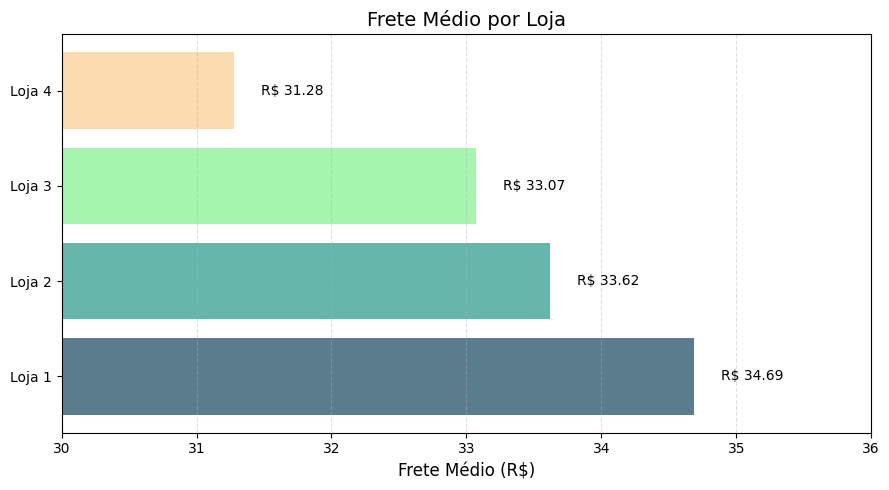

In [ ]:
# Importando biblioteca
import matplotlib.pyplot as plt

# Dados das lojas
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
fretes_medios = [34.69, 33.62, 33.07, 31.28]
cores = ['#5b7c8d', '#66b6ab', '#a6f6af', '#fbdcb0']

# Criando o gráfico
plt.figure(figsize=(9,5))
plt.barh(lojas, fretes_medios, color=cores)

# Adicionando título e Eixos
plt.title("Frete Médio por Loja", fontsize=14)
plt.xlabel("Frete Médio (R$)", fontsize=12)
plt.xlim(30, 36)
plt.grid(axis='x', linestyle='--', alpha=0.4)

for i, valor in enumerate(fretes_medios):
    plt.text(valor + 0.2, i, f"R$ {valor:.2f}", va='center', fontsize=10)

#Plotando o gráfico
plt.tight_layout()
plt.savefig("frete_medio_por_loja_horizontal.png", dpi=300, bbox_inches='tight')
plt.show()


# Relatório Final



## Objetivo da análise
O objetivo deste desafio foi auxiliar o Sr. João, que é proprietário de uma rede quatro lojas no e-Commerce Alura Store, a decidir qual delas apresenta um menor desempenho e por isso deveria ser vendida e investir o capital em um novo negócio, baseado nas análise de métricas de faturamento, vendas por categoria, avaliação de clientes, produtos mais e menos vendidos e custo médio de frete.

---

## Resultados das análises
Com base nos resultados obtidos, podemos fazer uma análise objetiva de desempenho das lojas nos principais critérios:

### 1. Faturamento total das lojas
- A loja 4 teve o menor faturamento (23,6%), comparada com as demais, cuja diferença para a loja 1 que teve o melhor desempenho (26.1%), foi de aproximadamente  R$150 mil a menos.

### 2. Categoria de produtos mais vendidas por cada loja
- Sobre o volume total de vendas, todas as 4 lojas tiveram um desempenho muito similares, variando de 2358 a 2360 produtos vendidos, sendo a Loja 4 com menor número de vendas.
- Em todas as lojas, as 3 principais categorias de produtos vendidos pertenceram, exatamente nessa sequência, às de móveis, eletrônicos e brinquedos. Neste quesito, a loja 2 teve o pior desempenho, totalizando um volume de vendas dessas categorias em 49,9%, enquanto que as demais lojas alcançaram margem de 52,4% (loja 1), 53,6% (loja 3) e 53,8% (loja 4).
- Demais categorias de produtos vendidos oscilaram na posição de vendas entre as lojas.

### 3. Média da avaliação dos clientes
- Na avaliação de satisfação pelos clientes, a loja 1 teve a pior avaliação (3,98) seguida da loja 4 (4,00), porém muito próximos quando comparados com as Lojas 2 e 3, que obtiveram pontuações superiores com 4,05 e 4,04, respectivamente.

### 4. Produtos mais e menos vendidos pelas lojas
- As vendas dos produtos mais e menos vendidos são relativamente próximas entre as lojas, sem discrepâncias que alterem significativamente a decisão.

### 5. Custo médio do frete de cada loja
- Loja 4 tem o menor custo de frete, o que é um ponto positivo, mas não suficiente para compensar o baixo faturamento.

---

## Conclusão
Após análise cuidadosa das métricas, chegamos à conclusão de que a Loja 4 é a que mais se destaca negativamente em:
- Faturamento mais baixo.
- Avaliação mediana dos clientes.
- Apesar de ter o frete mais barato, isso não se traduz em maior lucro.
- Nenhum diferencial competitivo mais claro.

Portanto, a recomendação é que o Sr. João considere vender a Loja 4, pois ela possui o pior desempenho geral e provavelmente tem menor potencial de retorno sobre investimento comparada às demais.

